#Name : Arnob Bokshi
#ID   : 2125051010

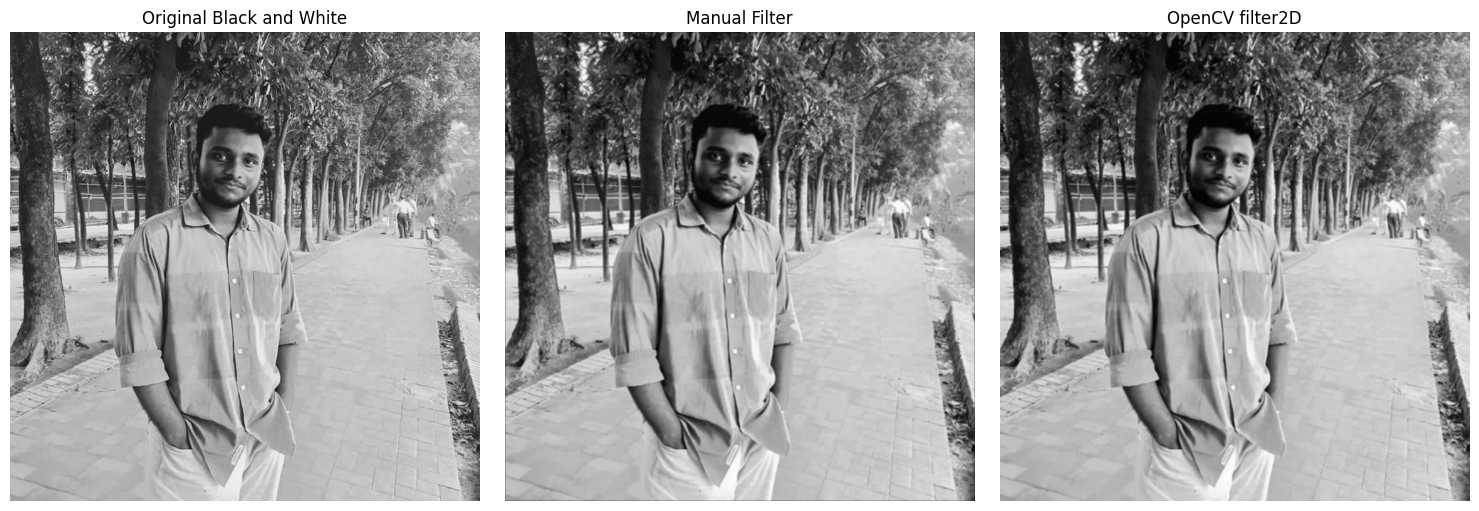

In [6]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

# Load black and white image from URL
url = 'https://images.pexels.com/photos/30786035/pexels-photo-30786035.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1'
img = Image.open(BytesIO(requests.get(url).content)).convert('L')
bw = np.array(img)

kernel = np.array([[1,1,1],[1,2,1],[1,1,1]], dtype=np.float32)
kernel /= kernel.sum()
manual = np.zeros_like(bw)
pad = 1
padded = np.pad(bw, pad)
for i in range(bw.shape[0]):
    for j in range(bw.shape[1]):
        region = padded[i:i+3, j:j+3]
        manual[i, j] = np.sum(region * kernel)

opencv_filtered = cv2.filter2D(bw, -1, kernel)

plt.figure(figsize=(15, 5))
titles = ['Original Black and White', 'Manual Filter', 'OpenCV filter2D']
images = [bw, manual, opencv_filtered]

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()
